In [135]:
%pip install decorator==5.0.9

import imp
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


In [136]:
# importing local modules

import sys
sys.path.append('../src/')

import text_cleanup.text_cleanup as thesisCleanUp
import preprocessing.text_preprocessing as thesisTextPreprocessing
import data.reader as thesisDataReader
import utils.utils as thesisUtils

imp.reload(thesisCleanUp)
imp.reload(thesisTextPreprocessing)
imp.reload(thesisDataReader)
imp.reload(thesisUtils)

<module 'utils.utils' from '../src/utils/utils.py'>

In [137]:
a_zwickau_text = thesisDataReader.read_a_zwickau()
b_london_text = thesisDataReader.read_b_london()

In [138]:
a_zwickau_corpus = thesisCleanUp.create_corpus_by_line(thesisCleanUp.jvtext(a_zwickau_text))
b_london_corpus = thesisCleanUp.create_corpus_by_line(thesisCleanUp.jvtext(b_london_text))

In [139]:
def get_features(corpus):
    count_vectorizer = CountVectorizer()
    sparse_matrix = count_vectorizer.fit_transform(corpus)
    doc_term_matrix = sparse_matrix.todense()
    df = pd.DataFrame(doc_term_matrix, columns=count_vectorizer.get_feature_names())
    return df

a_zwickau_df = get_features(a_zwickau_corpus)
a_zwickau_similarities = cosine_similarity(a_zwickau_df, a_zwickau_df)

b_london_df = get_features(b_london_corpus)
b_london_similarities = cosine_similarity(b_london_df, b_london_df)

In [140]:
def show_similarities_data(similarities):
    for index, value in enumerate(similarities):
        max_indices = thesisUtils.get_n_indexes_of_max_values(value, 6)
        print('___ max similariry for paragraph: {} ___'.format(index))
        for i in max_indices:
            print('index: [{}] value: {}'.format(i, similarities[index][i]))
        print('average: {}'.format(np.average(value)))

        unique, counts = np.unique(value, return_counts=True)
        unique_dictionary = dict(zip(unique, counts))
        print('0 similarities: {}'.format(unique_dictionary.get(0.0)))

        print()

In [141]:
show_similarities_data(a_zwickau_similarities)

___ max similariry for paragraph: 0 ___
index: [147] value: 0.08489527199560178
index: [79] value: 0.09325048082403138
index: [19] value: 0.13093073414159542
index: [49] value: 0.14907119849998596
index: [321] value: 0.2981423969999719
index: [0] value: 0.9999999999999999
average: 0.010523573386299726
0 similarities: 277

___ max similariry for paragraph: 1 ___
index: [283] value: 0.5207785898979804
index: [288] value: 0.5210797334966377
index: [42] value: 0.5221787059499383
index: [280] value: 0.5426208331435108
index: [289] value: 0.5659670877347581
index: [1] value: 1.0000000000000002
average: 0.27136194652898976
0 similarities: 4

___ max similariry for paragraph: 2 ___
index: [10] value: 0.33892841149279485
index: [297] value: 0.3436288414836225
index: [184] value: 0.34538959804401387
index: [123] value: 0.35689512920876265
index: [182] value: 0.37203955419831947
index: [2] value: 0.9999999999999997
average: 0.19290583474147313
0 similarities: 5

___ max similariry for paragraph: 

index: [299] value: 0.2629711204518062
index: [101] value: 0.2723849268720587
index: [219] value: 0.3009646327144231
index: [210] value: 0.9999999999999997
average: 0.14175767220474092
0 similarities: 2

___ max similariry for paragraph: 211 ___
index: [201] value: 0.5322650914479395
index: [297] value: 0.5530684173876804
index: [169] value: 0.5610765942731873
index: [64] value: 0.5636452794553989
index: [70] value: 0.5717473459704991
index: [211] value: 1.0000000000000002
average: 0.3432198041539042
0 similarities: 1

___ max similariry for paragraph: 212 ___
index: [182] value: 0.3896680269807997
index: [121] value: 0.3901794323484754
index: [88] value: 0.3907204023704541
index: [123] value: 0.3921465945863517
index: [184] value: 0.43543327031339285
index: [212] value: 1.0000000000000002
average: 0.22867600837879776
0 similarities: 3

___ max similariry for paragraph: 213 ___
index: [280] value: 0.371616661058901
index: [299] value: 0.374585125915641
index: [36] value: 0.382506646110

In [142]:
show_similarities_data(b_london_similarities)

___ max similariry for paragraph: 0 ___
index: [216] value: 0.22473328748774737
index: [46] value: 0.23438349412361906
index: [214] value: 0.23717082451262841
index: [161] value: 0.3078745359035396
index: [19] value: 0.31622776601683794
index: [0] value: 0.9999999999999999
average: 0.07355272703048302
0 similarities: 71

___ max similariry for paragraph: 1 ___
index: [280] value: 0.5186140765681567
index: [275] value: 0.5286068316639049
index: [272] value: 0.5388068630414614
index: [313] value: 0.5523841101337049
index: [281] value: 0.5570002760135979
index: [1] value: 1.0
average: 0.2913087040852929
0 similarities: None

___ max similariry for paragraph: 2 ___
index: [174] value: 0.38851798041316415
index: [118] value: 0.3906816887604908
index: [205] value: 0.3929341334137072
index: [37] value: 0.4000988020269483
index: [289] value: 0.4074753667262725
index: [2] value: 0.9999999999999997
average: 0.23710042511207313
0 similarities: 1

___ max similariry for paragraph: 3 ___
index: [28

index: [289] value: 0.3977977230504151
index: [73] value: 0.4030272189648229
index: [24] value: 0.40378642654362407
index: [36] value: 0.40378642654362407
index: [291] value: 0.42358687104367876
index: [256] value: 0.9999999999999998
average: 0.2451761397058468
0 similarities: 1

___ max similariry for paragraph: 257 ___
index: [18] value: 0.36647045615996826
index: [291] value: 0.3675428128779635
index: [9] value: 0.38039826810497046
index: [317] value: 0.40946151242666284
index: [247] value: 0.427960492510913
index: [257] value: 1.0000000000000002
average: 0.21574908499376827
0 similarities: 2

___ max similariry for paragraph: 258 ___
index: [250] value: 0.22360679774997896
index: [247] value: 0.2631174057921088
index: [238] value: 0.2683281572999748
index: [150] value: 0.2760262237369417
index: [214] value: 0.3162277660168379
index: [258] value: 1.0
average: 0.08144207991918619
0 similarities: 21

___ max similariry for paragraph: 259 ___
index: [120] value: 0.4525557286846652
inde

Observation that paragraph 6 in both version in top 5 have paragraph 5, although with different values, but it is among top 5.

Need to pay attention that paragraph in version 1 can be completely different in version 2 - create similarity between versions

In [168]:
def cross_version_similarity(version_1_corpus, version_2_corpus):
    for i, p in enumerate(version_1_corpus):
        temp_corpus = [p] + version_2_corpus
        df_features = get_features(temp_corpus)
        temp_similarities = cosine_similarity(df_features, df_features)
        print('similarities of paragraph: {}'.format(i))
        show_similarities_data([temp_similarities[0]])

In [171]:
cross_version_similarity(a_zwickau_corpus, b_london_corpus)

similarities of paragraph: 0
___ max similariry for paragraph: 0 ___
index: [12] value: 0.08567058737562386
index: [160] value: 0.1025978352085154
index: [9] value: 0.10811249552346706
index: [308] value: 0.10947611030079467
index: [20] value: 0.21081851067789198
index: [0] value: 0.9999999999999999
average: 0.010492193914265511
0 similarities: 270

similarities of paragraph: 1
___ max similariry for paragraph: 0 ___
index: [281] value: 0.5265488284699746
index: [273] value: 0.5399504387011153
index: [314] value: 0.5451380586625393
index: [282] value: 0.5623233939963108
index: [2] value: 0.8902455065849022
index: [0] value: 1.0000000000000007
average: 0.2837866476302864
0 similarities: None

similarities of paragraph: 2
___ max similariry for paragraph: 0 ___
index: [175] value: 0.3500423463936537
index: [155] value: 0.35038344169883956
index: [206] value: 0.3513564844273336
index: [38] value: 0.3669364471420551
index: [3] value: 0.9379580992210835
index: [0] value: 0.9999999999999997


similarities of paragraph: 25
___ max similariry for paragraph: 0 ___
index: [292] value: 0.5677040553176607
index: [296] value: 0.5726418119886069
index: [193] value: 0.5736648799606886
index: [290] value: 0.5915233301648641
index: [27] value: 0.8229625114061534
index: [0] value: 0.9999999999999998
average: 0.37416128362385787
0 similarities: None

similarities of paragraph: 26
___ max similariry for paragraph: 0 ___
index: [264] value: 0.42030999834212496
index: [290] value: 0.42564150534998824
index: [302] value: 0.4378774882063146
index: [294] value: 0.46323918454637725
index: [28] value: 0.7019641181630336
index: [0] value: 0.9999999999999998
average: 0.27833776750985295
0 similarities: None

similarities of paragraph: 27
___ max similariry for paragraph: 0 ___
index: [314] value: 0.6069420900338415
index: [206] value: 0.6075793192520552
index: [290] value: 0.6423353647625393
index: [296] value: 0.6440237247873974
index: [29] value: 0.8463068904244224
index: [0] value: 0.999999999

similarities of paragraph: 49
___ max similariry for paragraph: 0 ___
index: [51] value: 0.40930675293636154
index: [41] value: 0.4114406565333951
index: [27] value: 0.41176575972616913
index: [145] value: 0.44307094023030213
index: [253] value: 0.4570689631084537
index: [0] value: 1.0
average: 0.2604495560018551
0 similarities: None

similarities of paragraph: 50
___ max similariry for paragraph: 0 ___
index: [93] value: 0.3539844074164215
index: [256] value: 0.3909337423455329
index: [37] value: 0.39322809029339756
index: [318] value: 0.41478067789217016
index: [48] value: 0.6350006350009525
index: [0] value: 1.0000000000000002
average: 0.21456568157264674
0 similarities: 1

similarities of paragraph: 51
___ max similariry for paragraph: 0 ___
index: [25] value: 0.31524416249564025
index: [48] value: 0.3207134902949092
index: [59] value: 0.32142857142857134
index: [37] value: 0.33494692265161774
index: [49] value: 0.7637626158259734
index: [0] value: 0.9999999999999997
average: 0.126

similarities of paragraph: 73
___ max similariry for paragraph: 0 ___
index: [145] value: 0.5368066862600719
index: [311] value: 0.5525774500956567
index: [290] value: 0.5540321374183191
index: [292] value: 0.5626270880729534
index: [74] value: 0.8209397541960238
index: [0] value: 1.0
average: 0.36333214761546395
0 similarities: None

similarities of paragraph: 74
___ max similariry for paragraph: 0 ___
index: [232] value: 0.5836929733699393
index: [314] value: 0.6278746698678193
index: [290] value: 0.662919884187152
index: [292] value: 0.6654314251388659
index: [75] value: 0.8056719436741892
index: [0] value: 1.0000000000000002
average: 0.3834367934805345
0 similarities: None

similarities of paragraph: 75
___ max similariry for paragraph: 0 ___
index: [151] value: 0.3903600291794133
index: [135] value: 0.39727607885233024
index: [252] value: 0.41403933560541256
index: [76] value: 0.43571062644833447
index: [251] value: 0.5692099788303083
index: [0] value: 1.0
average: 0.1479712965932

similarities of paragraph: 98
___ max similariry for paragraph: 0 ___
index: [60] value: 0.48858818196140036
index: [98] value: 0.49656353316142066
index: [158] value: 0.5026970528291138
index: [213] value: 0.5231388366621641
index: [92] value: 0.6500000000000001
index: [0] value: 0.9999999999999998
average: 0.3120655952421809
0 similarities: None

similarities of paragraph: 99
___ max similariry for paragraph: 0 ___
index: [37] value: 0.38919487505796946
index: [74] value: 0.39308766356344377
index: [71] value: 0.39411412161988685
index: [98] value: 0.40050785259612853
index: [93] value: 0.6321304199334081
index: [0] value: 0.9999999999999997
average: 0.2587492752978493
0 similarities: None

similarities of paragraph: 100
___ max similariry for paragraph: 0 ___
index: [161] value: 0.43812151784212205
index: [54] value: 0.45014001532053366
index: [266] value: 0.4529652910465933
index: [314] value: 0.45880244522502883
index: [94] value: 0.5880692365231934
index: [0] value: 0.99999999999

similarities of paragraph: 122
___ max similariry for paragraph: 0 ___
index: [282] value: 0.4141826762140362
index: [281] value: 0.41565312425903306
index: [269] value: 0.4257425433423354
index: [149] value: 0.43643578047198484
index: [117] value: 0.7565344158360027
index: [0] value: 0.9999999999999998
average: 0.22311241634203172
0 similarities: 4

similarities of paragraph: 123
___ max similariry for paragraph: 0 ___
index: [314] value: 0.6119824266433566
index: [296] value: 0.6282491119250397
index: [306] value: 0.6406606132665177
index: [290] value: 0.6651869955181307
index: [119] value: 0.9248267346705284
index: [0] value: 1.0000000000000002
average: 0.39071367157041925
0 similarities: None

similarities of paragraph: 124
___ max similariry for paragraph: 0 ___
index: [282] value: 0.601926852090461
index: [281] value: 0.6117752903214979
index: [62] value: 0.6220907522417993
index: [43] value: 0.6266253105152977
index: [120] value: 0.8708896333420233
index: [0] value: 0.9999999999

similarities of paragraph: 148
___ max similariry for paragraph: 0 ___
index: [19] value: 0.2357022603955158
index: [245] value: 0.23809523809523808
index: [139] value: 0.24433888871261045
index: [33] value: 0.26536597994814665
index: [144] value: 0.3465516400418359
index: [0] value: 1.0
average: 0.12666324240224427
0 similarities: 4

similarities of paragraph: 149
___ max similariry for paragraph: 0 ___
index: [88] value: 0.5720544407035366
index: [311] value: 0.5881734504496565
index: [154] value: 0.5958540230683372
index: [149] value: 0.6684259874164044
index: [145] value: 0.8823529411764706
index: [0] value: 1.0000000000000002
average: 0.350686254126621
0 similarities: None

similarities of paragraph: 150
___ max similariry for paragraph: 0 ___
index: [177] value: 0.313529856431228
index: [18] value: 0.31352985643122805
index: [247] value: 0.3235430566933533
index: [163] value: 0.3439971465943615
index: [146] value: 0.5065187337952686
index: [0] value: 0.9999999999999998
average: 0

similarities of paragraph: 176
___ max similariry for paragraph: 0 ___
index: [72] value: 0.412598971154718
index: [163] value: 0.4869727823005635
index: [164] value: 0.48799199041635416
index: [165] value: 0.49122931971425277
index: [167] value: 0.8501691658837488
index: [0] value: 1.0
average: 0.2597635822269011
0 similarities: 1

similarities of paragraph: 177
___ max similariry for paragraph: 0 ___
index: [290] value: 0.5632704548599278
index: [173] value: 0.5639386990383498
index: [274] value: 0.5685427809876382
index: [101] value: 0.5875681005734616
index: [168] value: 0.9322081637929724
index: [0] value: 0.9999999999999997
average: 0.3544808498710287
0 similarities: None

similarities of paragraph: 178
___ max similariry for paragraph: 0 ___
index: [199] value: 0.4359619135461148
index: [200] value: 0.4409967284211011
index: [201] value: 0.44660638056206914
index: [203] value: 0.6118051614325885
index: [169] value: 0.7367094686837573
index: [0] value: 1.0
average: 0.218490555302

similarities of paragraph: 202
___ max similariry for paragraph: 0 ___
index: [141] value: 0.27036903521793754
index: [54] value: 0.27646845318586033
index: [130] value: 0.2795530723408051
index: [139] value: 0.28027592733560525
index: [30] value: 0.2951513807659691
index: [0] value: 0.9999999999999997
average: 0.11396716430916487
0 similarities: 13

similarities of paragraph: 203
___ max similariry for paragraph: 0 ___
index: [251] value: 0.37532594530273466
index: [228] value: 0.39593773131515986
index: [95] value: 0.3987219658473174
index: [213] value: 0.4355724051843767
index: [212] value: 0.6091095901015049
index: [0] value: 1.0000000000000002
average: 0.19815382489709168
0 similarities: 3

similarities of paragraph: 204
___ max similariry for paragraph: 0 ___
index: [296] value: 0.4803409936088642
index: [47] value: 0.4831155725081722
index: [290] value: 0.4891671804783885
index: [173] value: 0.49236710095683767
index: [213] value: 0.746351792533165
index: [0] value: 0.9999999999

similarities of paragraph: 230
___ max similariry for paragraph: 0 ___
index: [311] value: 0.514093466201076
index: [290] value: 0.5147871575075801
index: [296] value: 0.5184740696291036
index: [232] value: 0.5323422631145265
index: [149] value: 0.5346344007778838
index: [0] value: 1.0000000000000002
average: 0.3162422259456393
0 similarities: None

similarities of paragraph: 231
___ max similariry for paragraph: 0 ___
index: [74] value: 0.3751514184945698
index: [232] value: 0.3757192800598859
index: [133] value: 0.39411590014501013
index: [75] value: 0.4197113378651875
index: [97] value: 0.4299446183400111
index: [0] value: 0.9999999999999994
average: 0.19464576335432965
0 similarities: 1

similarities of paragraph: 232
___ max similariry for paragraph: 0 ___
index: [94] value: 0.43938802910487174
index: [149] value: 0.4670404485981708
index: [60] value: 0.4714372469891891
index: [145] value: 0.4990834089450872
index: [237] value: 0.8302566938593575
index: [0] value: 1.00000000000000

similarities of paragraph: 254
___ max similariry for paragraph: 0 ___
index: [60] value: 0.48067341450088774
index: [290] value: 0.48232497738323166
index: [267] value: 0.48391079087419847
index: [314] value: 0.48920815481386193
index: [261] value: 0.8888888888888891
index: [0] value: 1.0000000000000002
average: 0.29360553168691916
0 similarities: 1

similarities of paragraph: 255
___ max similariry for paragraph: 0 ___
index: [295] value: 0.4453639597046146
index: [256] value: 0.44769748082096283
index: [292] value: 0.4780314195708873
index: [290] value: 0.4792604775013228
index: [262] value: 0.9273700700409192
index: [0] value: 0.9999999999999999
average: 0.2870954020569583
0 similarities: None

similarities of paragraph: 256
___ max similariry for paragraph: 0 ___
index: [273] value: 0.4971760775462084
index: [276] value: 0.5045725975185579
index: [266] value: 0.5113886980210198
index: [149] value: 0.5525812382846659
index: [197] value: 0.7080238260310596
index: [0] value: 0.999999

similarities of paragraph: 279
___ max similariry for paragraph: 0 ___
index: [273] value: 0.6658642386946563
index: [314] value: 0.6711153681690963
index: [276] value: 0.6870554872078434
index: [274] value: 0.7052900598339572
index: [272] value: 0.9265670518654542
index: [0] value: 1.0000000000000002
average: 0.37299573185573853
0 similarities: 1

similarities of paragraph: 280
___ max similariry for paragraph: 0 ___
index: [314] value: 0.7352549956324637
index: [276] value: 0.7373328634612619
index: [274] value: 0.7448893486571788
index: [149] value: 0.7494438021352031
index: [273] value: 0.9604016551045274
index: [0] value: 0.9999999999999998
average: 0.4102460894976721
0 similarities: None

similarities of paragraph: 281
___ max similariry for paragraph: 0 ___
index: [43] value: 0.723148294646908
index: [273] value: 0.7267006020592086
index: [276] value: 0.7404461010046559
index: [314] value: 0.7446693353811283
index: [274] value: 0.9808019257310352
index: [0] value: 1.0
average: 0

similarities of paragraph: 307
___ max similariry for paragraph: 0 ___
index: [314] value: 0.5021929929795936
index: [274] value: 0.5354032266924222
index: [276] value: 0.5644863095628598
index: [294] value: 0.5739440431835514
index: [300] value: 0.9187105190739588
index: [0] value: 0.9999999999999999
average: 0.28574238513012745
0 similarities: 5

similarities of paragraph: 308
___ max similariry for paragraph: 0 ___
index: [302] value: 0.5371666495303682
index: [274] value: 0.54697972178021
index: [265] value: 0.5522905308428673
index: [303] value: 0.552949697027525
index: [301] value: 0.92587621751836
index: [0] value: 1.0000000000000002
average: 0.322902853875771
0 similarities: None

similarities of paragraph: 309
___ max similariry for paragraph: 0 ___
index: [292] value: 0.5657290785685453
index: [314] value: 0.5677390604262779
index: [290] value: 0.5964252801348191
index: [274] value: 0.6034291459567924
index: [302] value: 0.9411239481143204
index: [0] value: 0.9999999999999999

In [170]:
cross_version_similarity(b_london_corpus, a_zwickau_corpus)

similarities of paragraph: 0
___ max similariry for paragraph: 0 ___
index: [58] value: 0.22360679774997896
index: [29] value: 0.2429328990536748
index: [91] value: 0.26967994498529685
index: [168] value: 0.3071475584169756
index: [219] value: 0.3450327796711771
index: [0] value: 0.9999999999999999
average: 0.06943010033728667
0 similarities: 88

similarities of paragraph: 1
___ max similariry for paragraph: 0 ___
index: [43] value: 0.5268140465549274
index: [284] value: 0.5316562815624934
index: [281] value: 0.5409898532368471
index: [290] value: 0.5601742216741843
index: [2] value: 0.8902455065849022
index: [0] value: 1.0
average: 0.28121229328678193
0 similarities: 4

similarities of paragraph: 2
___ max similariry for paragraph: 0 ___
index: [314] value: 0.38455746790429207
index: [124] value: 0.4044499010486059
index: [183] value: 0.40618119722996154
index: [298] value: 0.4087469906534114
index: [3] value: 0.9379580992210835
index: [0] value: 0.9999999999999997
average: 0.22990617

similarities of paragraph: 25
___ max similariry for paragraph: 0 ___
index: [314] value: 0.5853375398572123
index: [319] value: 0.5909948069809525
index: [298] value: 0.6290939015664742
index: [300] value: 0.6438816247419403
index: [25] value: 0.8394763777501381
index: [0] value: 1.0
average: 0.3670337283978478
0 similarities: 1

similarities of paragraph: 26
___ max similariry for paragraph: 0 ___
index: [300] value: 0.6473691922238496
index: [122] value: 0.6630834932080997
index: [304] value: 0.6706801686631817
index: [298] value: 0.6963309521784717
index: [26] value: 0.8229625114061535
index: [0] value: 1.0
average: 0.4044160126479409
0 similarities: None

similarities of paragraph: 27
___ max similariry for paragraph: 0 ___
index: [89] value: 0.5663761444313731
index: [300] value: 0.5733381986594611
index: [122] value: 0.5805364744126167
index: [298] value: 0.5817860980967308
index: [27] value: 0.7019641181630336
index: [0] value: 1.0
average: 0.35191770016533436
0 similarities: 2

similarities of paragraph: 50
___ max similariry for paragraph: 0 ___
index: [55] value: 0.5265476219080378
index: [300] value: 0.5417287171774929
index: [298] value: 0.561746658054397
index: [304] value: 0.5720034267929169
index: [54] value: 0.7321901785723332
index: [0] value: 1.0
average: 0.3327740150429638
0 similarities: 1

similarities of paragraph: 51
___ max similariry for paragraph: 0 ___
index: [10] value: 0.5734474712864744
index: [170] value: 0.5870517262091254
index: [298] value: 0.5888033118722185
index: [300] value: 0.6286783628741818
index: [55] value: 0.8558824638586375
index: [0] value: 0.9999999999999997
average: 0.3748542584955399
0 similarities: 1

similarities of paragraph: 52
___ max similariry for paragraph: 0 ___
index: [89] value: 0.6297107117751329
index: [43] value: 0.6315575043048224
index: [282] value: 0.6334470991296706
index: [298] value: 0.639643383036974
index: [56] value: 0.9033433145255443
index: [0] value: 0.9999999999999998
average: 0.3741787191772

similarities of paragraph: 75
___ max similariry for paragraph: 0 ___
index: [222] value: 0.4251952027621872
index: [76] value: 0.43571062644833447
index: [298] value: 0.43933438959675475
index: [53] value: 0.4476706355737556
index: [168] value: 0.4696466790520871
index: [0] value: 1.0000000000000002
average: 0.2678038094237711
0 similarities: 2

similarities of paragraph: 76
___ max similariry for paragraph: 0 ___
index: [304] value: 0.4941631731910274
index: [122] value: 0.4976606149894529
index: [319] value: 0.5149852553297528
index: [298] value: 0.5412367087235936
index: [77] value: 0.642416074439621
index: [0] value: 1.0
average: 0.3177393990424752
0 similarities: None

similarities of paragraph: 77
___ max similariry for paragraph: 0 ___
index: [300] value: 0.49053248599421856
index: [43] value: 0.5079992591779656
index: [304] value: 0.5345407390624295
index: [64] value: 0.5829748655624453
index: [78] value: 0.7041868508280461
index: [0] value: 1.0000000000000004
average: 0.30353

similarities of paragraph: 103
___ max similariry for paragraph: 0 ___
index: [122] value: 0.46594862360960165
index: [298] value: 0.47039611924802427
index: [78] value: 0.47735535177489297
index: [319] value: 0.4841815036662407
index: [111] value: 0.7679817174694635
index: [0] value: 0.9999999999999999
average: 0.30678989309095567
0 similarities: 1

similarities of paragraph: 104
___ max similariry for paragraph: 0 ___
index: [85] value: 0.3042903097250923
index: [71] value: 0.31999999999999995
index: [201] value: 0.32022238035677014
index: [144] value: 0.32781501882489184
index: [237] value: 0.38890872965260115
index: [0] value: 1.0
average: 0.13853995524293344
0 similarities: 10

similarities of paragraph: 105
___ max similariry for paragraph: 0 ___
index: [16] value: 0.2914077525750981
index: [110] value: 0.35781322366606727
index: [111] value: 0.39840953644479793
index: [39] value: 0.3991861639585407
index: [113] value: 0.49692934659788807
index: [0] value: 1.0000000000000004
aver

similarities of paragraph: 130
___ max similariry for paragraph: 0 ___
index: [222] value: 0.37980008786676056
index: [121] value: 0.3825268309478722
index: [137] value: 0.3889733106610521
index: [64] value: 0.418420826252644
index: [136] value: 0.5144261613014582
index: [0] value: 0.9999999999999999
average: 0.21377491201325655
0 similarities: 1

similarities of paragraph: 131
___ max similariry for paragraph: 0 ___
index: [29] value: 0.3301498956686877
index: [168] value: 0.3606497548653876
index: [91] value: 0.4251395138957577
index: [210] value: 0.46178947199021964
index: [137] value: 0.6320816298242099
index: [0] value: 0.9999999999999999
average: 0.13062189138866337
0 similarities: 11

similarities of paragraph: 132
___ max similariry for paragraph: 0 ___
index: [300] value: 0.4744978158940508
index: [271] value: 0.48865420589831343
index: [11] value: 0.49418771478814866
index: [226] value: 0.5902813361009552
index: [138] value: 0.8275743170678602
index: [0] value: 1.000000000000

similarities of paragraph: 154
___ max similariry for paragraph: 0 ___
index: [314] value: 0.5839298730189746
index: [124] value: 0.5878730931196033
index: [304] value: 0.612390845469834
index: [298] value: 0.6150072083822099
index: [165] value: 0.7911093535973106
index: [0] value: 1.0
average: 0.3294179405950999
0 similarities: 2

similarities of paragraph: 155
___ max similariry for paragraph: 0 ___
index: [280] value: 0.45443350537482563
index: [282] value: 0.45742008714249677
index: [152] value: 0.45983262858178264
index: [302] value: 0.5251535631716886
index: [161] value: 0.5409261385123277
index: [0] value: 1.0
average: 0.2213787224000039
0 similarities: 5

similarities of paragraph: 156
___ max similariry for paragraph: 0 ___
index: [73] value: 0.4455026336463165
index: [300] value: 0.44866074819833124
index: [212] value: 0.453087278660152
index: [122] value: 0.4612891373735056
index: [162] value: 0.7919722704868375
index: [0] value: 0.9999999999999998
average: 0.299706112001263

similarities of paragraph: 179
___ max similariry for paragraph: 0 ___
index: [28] value: 0.3755556050898002
index: [298] value: 0.38415000144656486
index: [124] value: 0.38486288962598164
index: [102] value: 0.4014137094923034
index: [189] value: 0.8240428163590192
index: [0] value: 1.0000000000000002
average: 0.21893242748557118
0 similarities: 6

similarities of paragraph: 180
___ max similariry for paragraph: 0 ___
index: [170] value: 0.4780725255277182
index: [185] value: 0.48024689860998054
index: [298] value: 0.4873969255606349
index: [183] value: 0.5275241065994879
index: [190] value: 0.6681531047810609
index: [0] value: 1.0
average: 0.29925496004001456
0 similarities: 2

similarities of paragraph: 181
___ max similariry for paragraph: 0 ___
index: [193] value: 0.1768258204039619
index: [131] value: 0.19847104650936115
index: [110] value: 0.20835137007059354
index: [182] value: 0.22131333406899528
index: [191] value: 0.48107023544236377
index: [0] value: 0.9999999999999997
aver

similarities of paragraph: 204
___ max similariry for paragraph: 0 ___
index: [289] value: 0.5390270510951168
index: [281] value: 0.5421481778829378
index: [258] value: 0.5483446162604483
index: [282] value: 0.5619530267509537
index: [265] value: 0.8446717229993574
index: [0] value: 1.0000000000000004
average: 0.30112128783978126
0 similarities: 2

similarities of paragraph: 205
___ max similariry for paragraph: 0 ___
index: [304] value: 0.6430372242589752
index: [300] value: 0.6470278243277195
index: [170] value: 0.6489978680954477
index: [298] value: 0.6700438149258232
index: [122] value: 0.6720050512846079
index: [0] value: 1.0
average: 0.39800718425164144
0 similarities: 1

similarities of paragraph: 206
___ max similariry for paragraph: 0 ___
index: [22] value: 0.2508038605953525
index: [179] value: 0.251914060535486
index: [128] value: 0.29488391230979427
index: [105] value: 0.30174873642981176
index: [167] value: 0.32871912932571284
index: [0] value: 0.9999999999999998
average: 

similarities of paragraph: 229
___ max similariry for paragraph: 0 ___
index: [220] value: 0.3263956049169334
index: [150] value: 0.3322493196224943
index: [74] value: 0.34767674768255763
index: [161] value: 0.36266178324103704
index: [208] value: 0.40291148201269006
index: [0] value: 0.9999999999999998
average: 0.19457447551804685
0 similarities: 1

similarities of paragraph: 230
___ max similariry for paragraph: 0 ___
index: [88] value: 0.38109680292504733
index: [301] value: 0.38669290020429675
index: [222] value: 0.3959231844966214
index: [87] value: 0.4067458291375898
index: [224] value: 0.5993055824025229
index: [0] value: 1.0
average: 0.23543086340360145
0 similarities: 1

similarities of paragraph: 231
___ max similariry for paragraph: 0 ___
index: [89] value: 0.6227883259076332
index: [300] value: 0.6333432468954685
index: [71] value: 0.6354748667449415
index: [298] value: 0.6417800947606596
index: [225] value: 0.6992748782757541
index: [0] value: 1.0
average: 0.39469704671357

similarities of paragraph: 253
___ max similariry for paragraph: 0 ___
index: [33] value: 0.4062499999999999
index: [251] value: 0.4192627457812106
index: [249] value: 0.4208127057650865
index: [77] value: 0.4403524229639896
index: [250] value: 0.9860636027008748
index: [0] value: 0.9999999999999999
average: 0.17988124958600468
0 similarities: 5

similarities of paragraph: 254
___ max similariry for paragraph: 0 ___
index: [122] value: 0.4191466218133072
index: [22] value: 0.4303314829119351
index: [298] value: 0.45050158786875427
index: [300] value: 0.48531111848012526
index: [251] value: 0.9250000000000003
index: [0] value: 1.0000000000000002
average: 0.27273940970200933
0 similarities: 1

similarities of paragraph: 255
___ max similariry for paragraph: 0 ___
index: [82] value: 0.5339506999380769
index: [183] value: 0.5345920242510618
index: [122] value: 0.5540450951072728
index: [298] value: 0.561643034739027
index: [252] value: 0.8910394968592897
index: [0] value: 1.000000000000000

similarities of paragraph: 278
___ max similariry for paragraph: 0 ___
index: [307] value: 0.3740878118331298
index: [271] value: 0.3768972770730658
index: [46] value: 0.376984018768841
index: [165] value: 0.3786200927092679
index: [287] value: 0.8777908163823702
index: [0] value: 1.0
average: 0.21664747090899297
0 similarities: 3

similarities of paragraph: 279
___ max similariry for paragraph: 0 ___
index: [290] value: 0.54391022879808
index: [282] value: 0.5443535165354954
index: [289] value: 0.5460905098730241
index: [284] value: 0.5488997638736404
index: [288] value: 0.9226602744900404
index: [0] value: 0.9999999999999999
average: 0.289623919727395
0 similarities: 3

similarities of paragraph: 280
___ max similariry for paragraph: 0 ___
index: [281] value: 0.7164242487701009
index: [216] value: 0.7188398968691606
index: [43] value: 0.739742843940769
index: [290] value: 0.7643459881600199
index: [289] value: 0.9735991677099562
index: [0] value: 1.0
average: 0.3420914644335838
0 sim

similarities of paragraph: 303
___ max similariry for paragraph: 0 ___
index: [298] value: 0.466401580429272
index: [71] value: 0.4770712296658696
index: [300] value: 0.4795588552981127
index: [314] value: 0.48260285011738124
index: [312] value: 0.9085857455671156
index: [0] value: 0.9999999999999997
average: 0.28379144493095787
0 similarities: None

similarities of paragraph: 304
___ max similariry for paragraph: 0 ___
index: [281] value: 0.6294069304404822
index: [290] value: 0.6319252221557153
index: [43] value: 0.6335399826589285
index: [289] value: 0.6504854368932039
index: [313] value: 0.8128551833402206
index: [0] value: 1.0
average: 0.32939319941330164
0 similarities: 5

similarities of paragraph: 305
___ max similariry for paragraph: 0 ___
index: [300] value: 0.6599187919235491
index: [304] value: 0.6615637948900907
index: [319] value: 0.6748852919446883
index: [298] value: 0.726152596220527
index: [314] value: 0.980113141972366
index: [0] value: 0.9999999999999998
average: 0.

Observation that that most paragraph in a_zwickau version are similar to they corresponding paragraph in b_london (remember that we added a new paragraph, so if p 1 similart to 2 - the meaning that 1 similart to 1, cause of a p added to b_london)

After p 20 it seems that correspondences switches, meaning that p 25 a_zwickau similar to p 27 b_london

And aligns back at p 40

At p 50 similarity switches to 50 -> 48, before it we had x -> x+2, not x -> x-2

At p 78 they even not close to any surronded paragraphs

In [144]:
def create_G_of_similaritis(similarities):
    G = nx.Graph()
    for index, value in enumerate(similarities):
        max_indices = thesisUtils.get_n_indexes_of_max_values(value, 6)
        max_indices_without_self = max_indices[:-1]
        G.add_node(index) # node himself
        for n in max_indices_without_self:
            G.add_node(n)
            weight = similarities[index][n]
            G.add_weighted_edges_from([(index, n, weight)])
    return G

In [156]:
def show_G(G):
    %matplotlib notebook

    fig = plt.figure(figsize=(10, 10))
    fig.canvas.manager.full_screen_toggle()

    pos=nx.spring_layout(G)
    nx.draw(
        G, 
        pos,
        with_labels=True, 
    )
    fig.show()

In [151]:
a_zwickau_G = create_G_of_similaritis(a_zwickau_similarities)
b_london_G = create_G_of_similaritis(b_london_similarities)

In [152]:
print(len(list(nx.connected_components(a_zwickau_G))))
print(len(list(nx.connected_components(b_londob_G))))

1
1


In [160]:
a_zwickau_sorted_degree = sorted(a_zwickau_G.degree, key=lambda x: x[1], reverse=True)
print(a_zwickau_sorted_degree)
# it seems that all nodes that have degree of 5 might be not relevant since they are similar to something, 
# but nobody similar to them

[(297, 150), (299, 104), (281, 68), (303, 67), (121, 60), (280, 49), (313, 45), (42, 44), (88, 42), (70, 42), (283, 40), (318, 37), (169, 29), (288, 25), (36, 25), (289, 24), (63, 24), (182, 23), (123, 18), (81, 18), (301, 18), (152, 17), (167, 17), (74, 17), (201, 16), (91, 16), (211, 16), (101, 16), (73, 15), (21, 14), (72, 14), (76, 14), (273, 14), (46, 14), (58, 14), (64, 14), (56, 13), (192, 13), (77, 13), (184, 12), (59, 12), (78, 12), (251, 12), (137, 12), (98, 12), (149, 11), (87, 11), (134, 11), (30, 11), (105, 11), (219, 11), (90, 11), (236, 11), (279, 11), (10, 10), (9, 10), (44, 10), (24, 10), (54, 10), (82, 10), (68, 10), (143, 10), (16, 9), (18, 9), (185, 9), (136, 9), (298, 9), (32, 9), (35, 9), (40, 9), (248, 9), (254, 9), (140, 9), (225, 9), (253, 9), (221, 9), (173, 9), (257, 9), (243, 9), (224, 9), (15, 8), (23, 8), (139, 8), (25, 8), (309, 8), (45, 8), (240, 8), (124, 8), (111, 8), (86, 8), (114, 8), (164, 8), (270, 8), (274, 8), (255, 8), (175, 8), (258, 8), (260, 

In [159]:
b_london_sorted_degree = sorted(b_london_G.degree, key=lambda x: x[1], reverse=True)
print(b_london_sorted_degree)

[(289, 143), (313, 100), (291, 81), (295, 63), (92, 52), (273, 52), (148, 43), (205, 40), (305, 34), (42, 34), (310, 32), (280, 31), (275, 30), (192, 26), (272, 24), (53, 24), (157, 23), (161, 21), (281, 21), (37, 21), (59, 21), (73, 20), (144, 19), (98, 19), (197, 19), (94, 19), (80, 18), (102, 17), (233, 17), (212, 17), (31, 16), (293, 15), (70, 14), (154, 14), (71, 14), (317, 14), (231, 14), (134, 14), (26, 13), (265, 13), (85, 13), (51, 13), (100, 13), (96, 13), (55, 12), (9, 12), (83, 12), (162, 12), (255, 12), (46, 11), (174, 11), (118, 11), (183, 11), (69, 11), (153, 11), (65, 11), (188, 11), (147, 10), (18, 10), (54, 10), (36, 10), (97, 10), (200, 10), (74, 10), (235, 10), (91, 10), (172, 10), (151, 10), (82, 9), (152, 9), (117, 9), (160, 9), (209, 9), (247, 9), (228, 9), (227, 9), (61, 9), (119, 9), (138, 9), (301, 9), (264, 9), (216, 8), (165, 8), (44, 8), (219, 8), (103, 8), (215, 8), (25, 8), (263, 8), (120, 8), (135, 8), (240, 8), (121, 8), (130, 8), (217, 8), (225, 8), (2

In [166]:
a_zwickau_strongly_connected_nodes = [(node, degree) for node, degree in a_zwickau_sorted_degree if degree >= 10]
print(len(a_zwickau_strongly_connected_nodes))
print(a_zwickau_strongly_connected_nodes)

62
[(297, 150), (299, 104), (281, 68), (303, 67), (121, 60), (280, 49), (313, 45), (42, 44), (88, 42), (70, 42), (283, 40), (318, 37), (169, 29), (288, 25), (36, 25), (289, 24), (63, 24), (182, 23), (123, 18), (81, 18), (301, 18), (152, 17), (167, 17), (74, 17), (201, 16), (91, 16), (211, 16), (101, 16), (73, 15), (21, 14), (72, 14), (76, 14), (273, 14), (46, 14), (58, 14), (64, 14), (56, 13), (192, 13), (77, 13), (184, 12), (59, 12), (78, 12), (251, 12), (137, 12), (98, 12), (149, 11), (87, 11), (134, 11), (30, 11), (105, 11), (219, 11), (90, 11), (236, 11), (279, 11), (10, 10), (9, 10), (44, 10), (24, 10), (54, 10), (82, 10), (68, 10), (143, 10)]


In [167]:
b_london_strongly_connected_nodes = [(node, degree) for node, degree in b_london_sorted_degree if degree >= 10]
print(len(b_london_strongly_connected_nodes))
print(b_london_strongly_connected_nodes)

68
[(289, 143), (313, 100), (291, 81), (295, 63), (92, 52), (273, 52), (148, 43), (205, 40), (305, 34), (42, 34), (310, 32), (280, 31), (275, 30), (192, 26), (272, 24), (53, 24), (157, 23), (161, 21), (281, 21), (37, 21), (59, 21), (73, 20), (144, 19), (98, 19), (197, 19), (94, 19), (80, 18), (102, 17), (233, 17), (212, 17), (31, 16), (293, 15), (70, 14), (154, 14), (71, 14), (317, 14), (231, 14), (134, 14), (26, 13), (265, 13), (85, 13), (51, 13), (100, 13), (96, 13), (55, 12), (9, 12), (83, 12), (162, 12), (255, 12), (46, 11), (174, 11), (118, 11), (183, 11), (69, 11), (153, 11), (65, 11), (188, 11), (147, 10), (18, 10), (54, 10), (36, 10), (97, 10), (200, 10), (74, 10), (235, 10), (91, 10), (172, 10), (151, 10)]


<IPython.core.display.Javascript object>


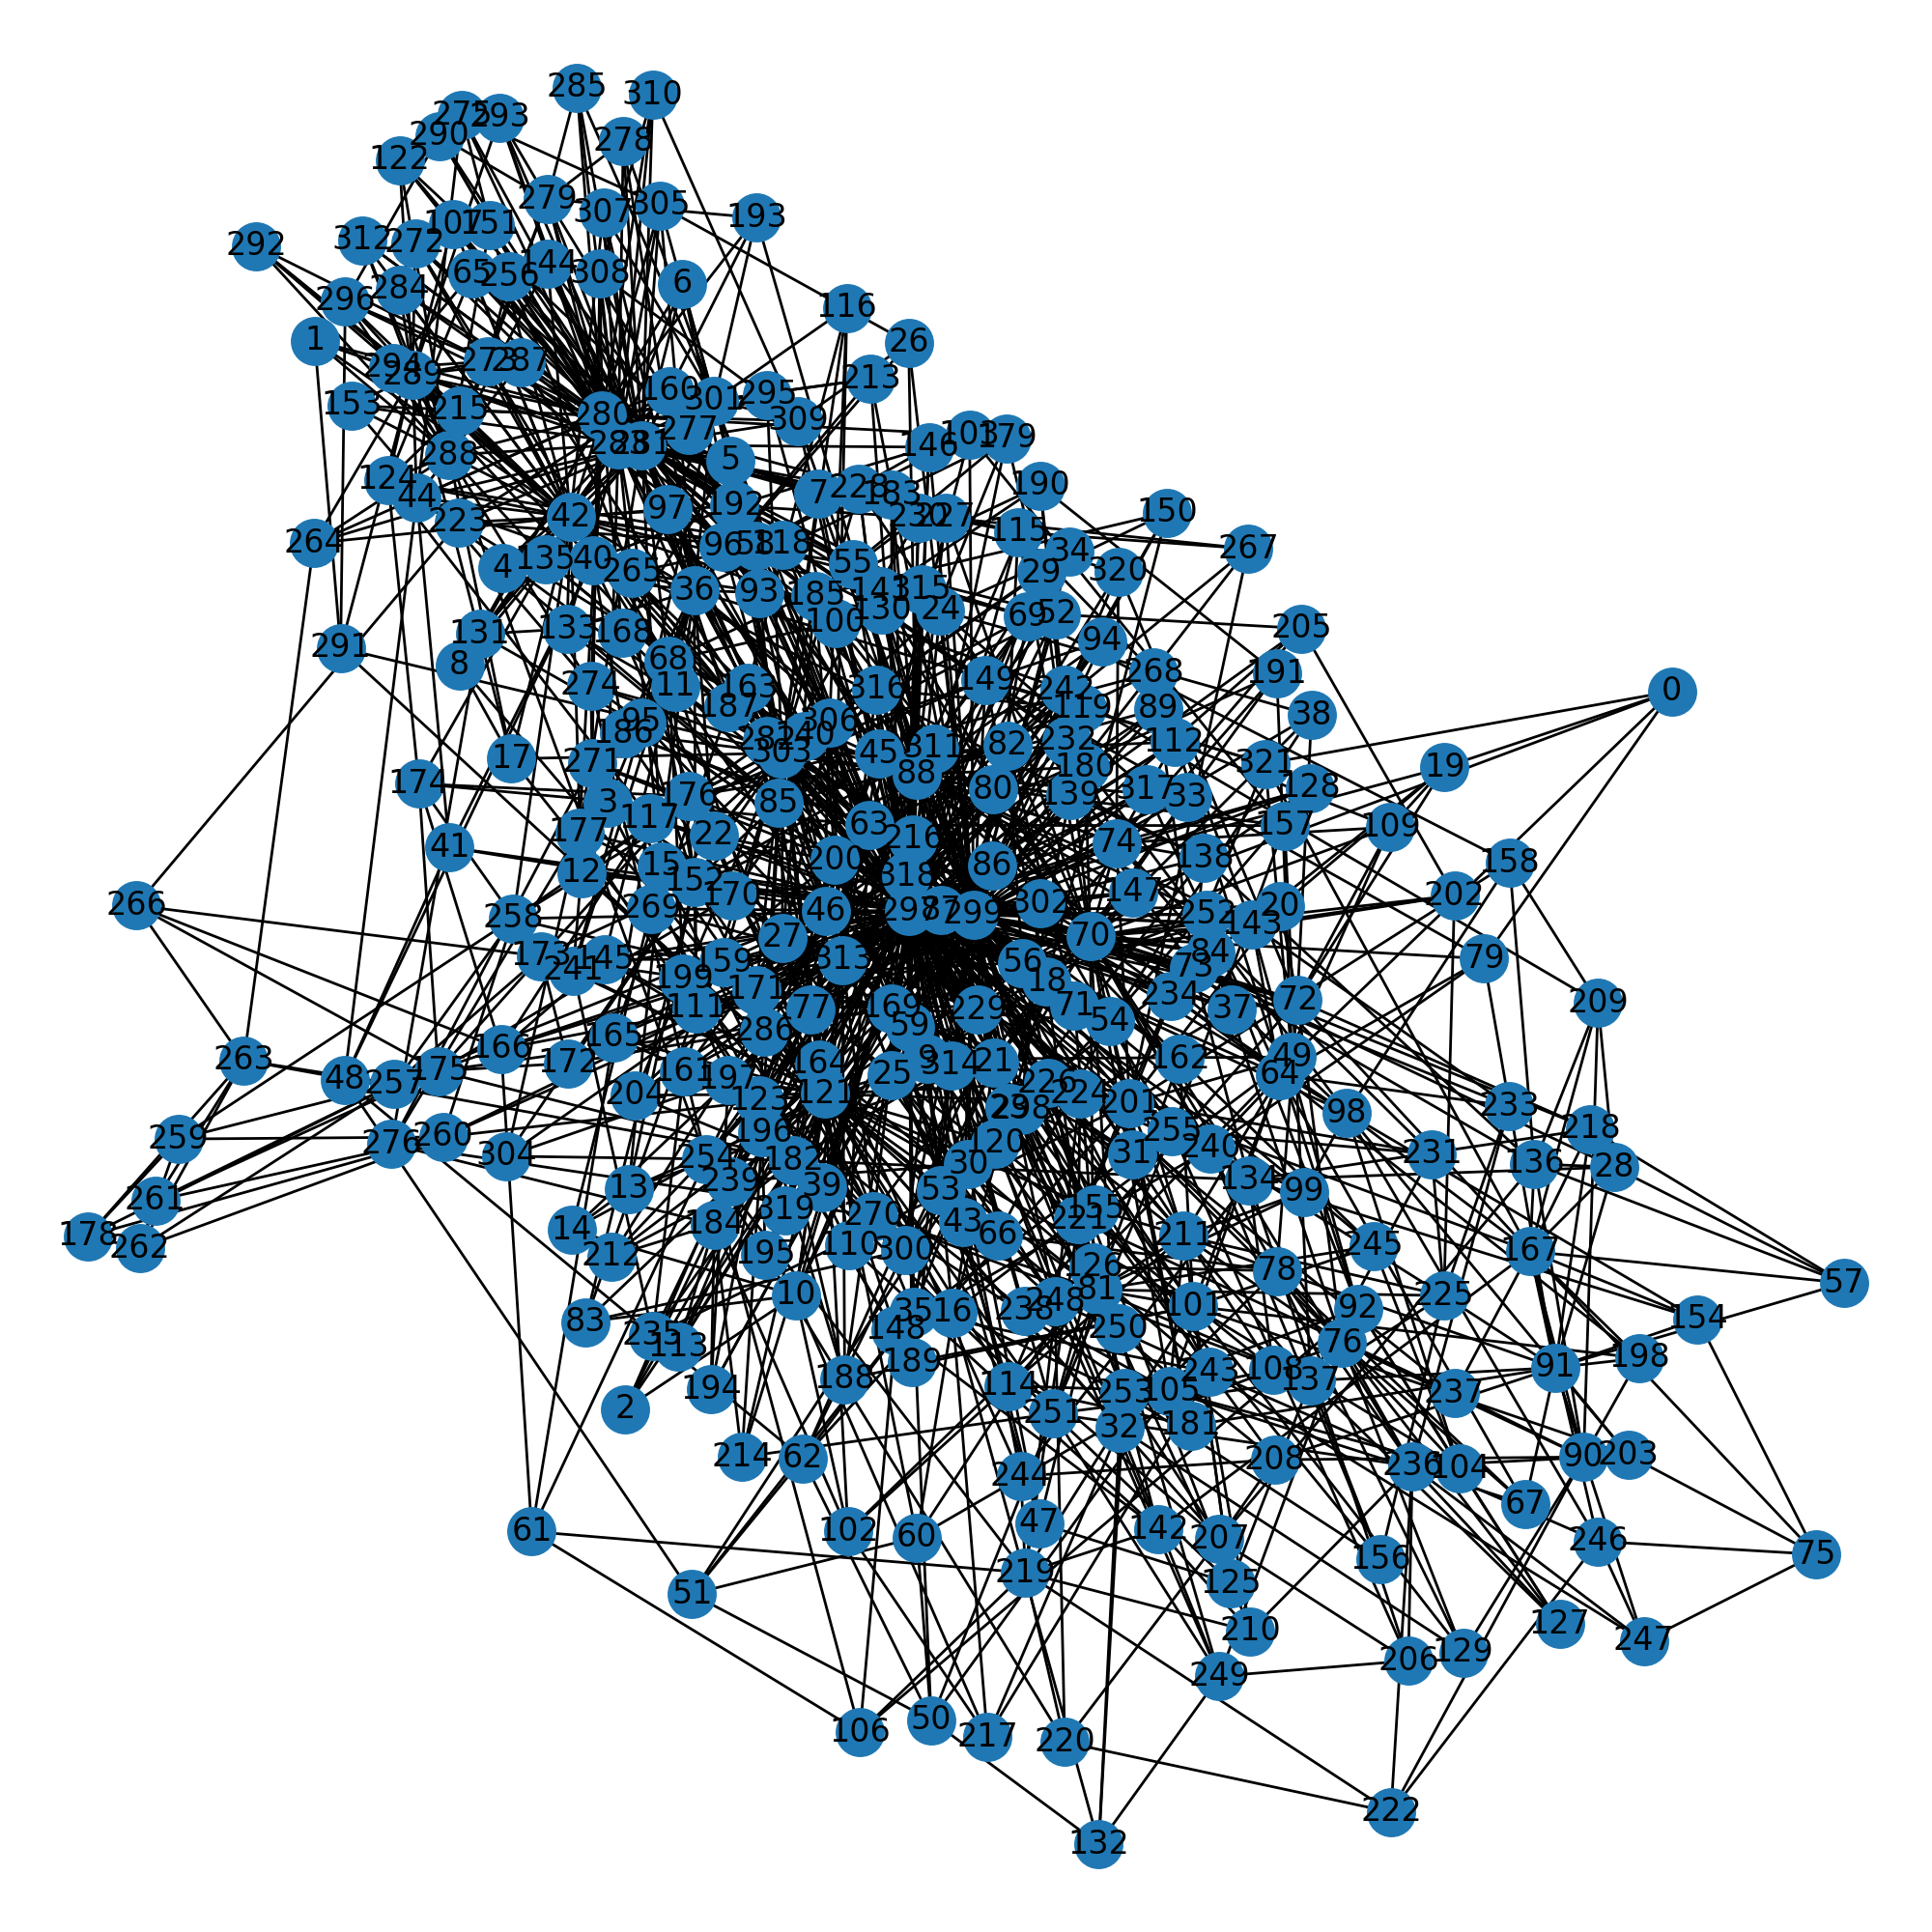

In [134]:
show_G(a_zwickau_G)

<IPython.core.display.Javascript object>


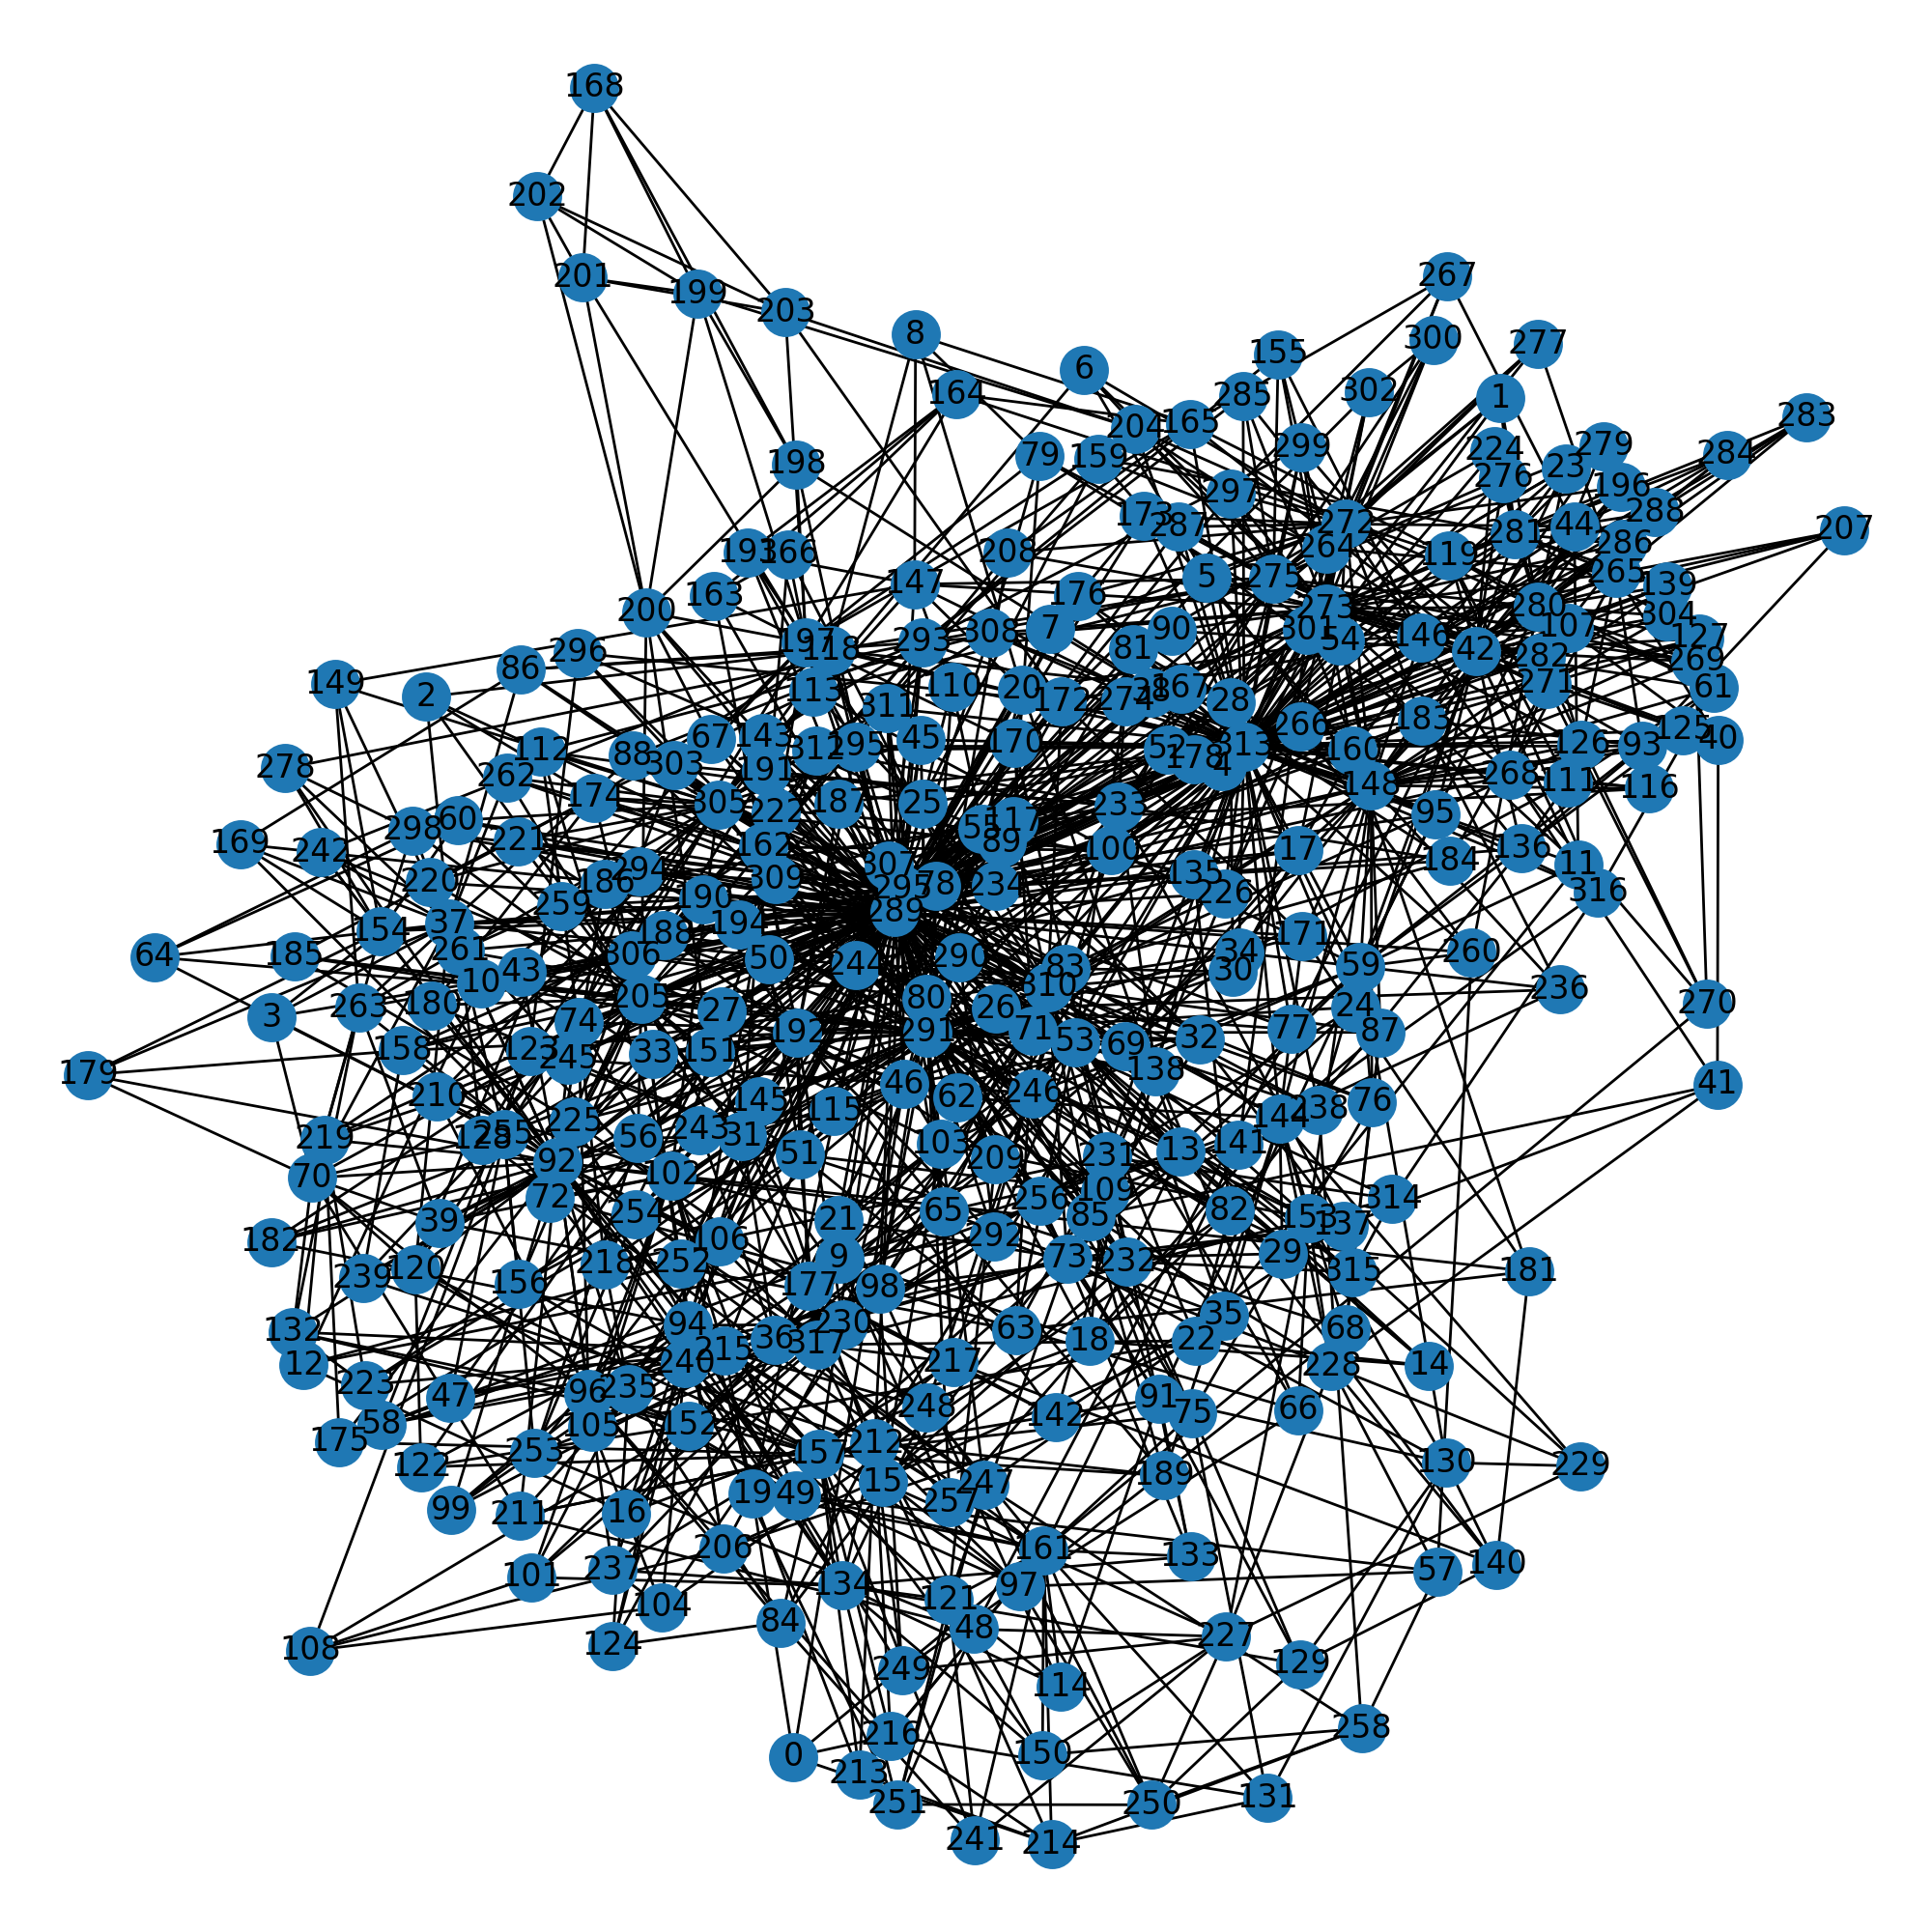

In [157]:
show_G(b_london_G)